In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import manifold
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
df.isnull().values.ravel()

array([False, False, False, ..., False, False, False])

In [5]:
sum(df.isnull().values.ravel())

0

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

The graph below shows the count of the Class column. '0' reperesnts non_fraudulent activities while '1' represents fraudulent activities.


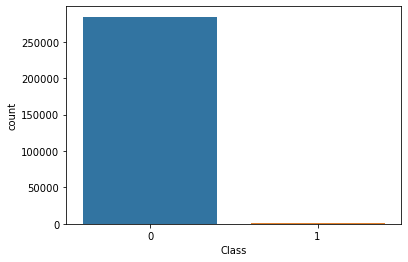

In [7]:
print("The graph below shows the count of the Class column. '0' reperesnts non_fraudulent activities while '1' represents fraudulent activities.")

sns.countplot(x='Class',data=df)

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
print (df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [11]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.656562e-16 -3.444850e-16  2.578648e-16  4.471968e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.687098e-15 -3.666453e-16 -1.220404e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [12]:
df.median()

Time      84692.000000
V1            0.018109
V2            0.065486
V3            0.179846
V4           -0.019847
V5           -0.054336
V6           -0.274187
V7            0.040103
V8            0.022358
V9           -0.051429
V10          -0.092917
V11          -0.032757
V12           0.140033
V13          -0.013568
V14           0.050601
V15           0.048072
V16           0.066413
V17          -0.065676
V18          -0.003636
V19           0.003735
V20          -0.062481
V21          -0.029450
V22           0.006782
V23          -0.011193
V24           0.040976
V25           0.016594
V26          -0.052139
V27           0.001342
V28           0.011244
Amount       22.000000
Class         0.000000
dtype: float64

In [13]:
midValues = df.median()

In [14]:
df.mean()

Time      9.481386e+04
V1        3.919560e-15
V2        5.688174e-16
V3       -8.769071e-15
V4        2.782312e-15
V5       -1.552563e-15
V6        2.010663e-15
V7       -1.694249e-15
V8       -1.927028e-16
V9       -3.137024e-15
V10       1.768627e-15
V11       9.170318e-16
V12      -1.810658e-15
V13       1.693438e-15
V14       1.479045e-15
V15       3.482336e-15
V16       1.392007e-15
V17      -7.528491e-16
V18       4.328772e-16
V19       9.049732e-16
V20       5.085503e-16
V21       1.537294e-16
V22       7.959909e-16
V23       5.367590e-16
V24       4.458112e-15
V25       1.453003e-15
V26       1.699104e-15
V27      -3.660161e-16
V28      -1.206049e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [15]:
avgValues = df.mean()

In [16]:
import statistics

In [17]:
print('Mean of the Amount:', np.mean(df['Amount']))
print('Standard Deviation of the Amount:', np.std(df['Amount']))
print('Median of the Amount:', np.median(df['Amount']))
print('Variance of the Amount:', np.var(df['Amount']))

Mean of the Amount: 88.34961925093133
Standard Deviation of the Amount: 250.11967013523534
Median of the Amount: 22.0
Variance of the Amount: 62559.849388558934


In [18]:
import scipy
from scipy.stats import skew, kurtosis

In [19]:
print('Skewness of the Amount:', skew(df['Amount']))
print('Kurtosis of the Amount:', kurtosis(df['Amount']))

Skewness of the Amount: 16.97763503663315
Kurtosis of the Amount: 845.0777883188754


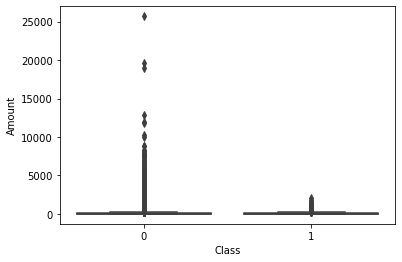

In [20]:
sns.boxplot(x='Class', y='Amount', data=df)

In [21]:
dfByClass = df.groupby('Class')

In [22]:
dfByClass.head()

Time        V1        V2        V3        V4        V5        V6  \
0        0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2        1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3        1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4        2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
0     0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474   
1    -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288   
2     0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412   
3     0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321   
4     0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458   
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
0     0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1    -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2    -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3    -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4     0.141267 -0.206010  0.502292  0.219422  0.215153   69.99      0  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[10 rows x 31 columns]

In [23]:
dfByClass.mean()

Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30 columns]

In [24]:
dfByClass.median()

Time        V1        V2        V3        V4        V5        V6  \
Class                                                                        
0      84711.0  0.020023  0.064070  0.182158 -0.022405 -0.053457 -0.273123   
1      75568.5 -2.342497  2.717869 -5.075257  4.177147 -1.522962 -1.424616   

             V7        V8        V9  ...       V20       V21       V22  \
Class                                ...                                 
0      0.041138  0.022041 -0.049964  ... -0.062646 -0.029821  0.006736   
1     -3.034402  0.621508 -2.208768  ...  0.284693  0.592146  0.048434   

            V23       V24       V25       V26       V27       V28  Amount  
Class                                                                      
0     -0.011147  0.041082  0.016417 -0.052227  0.001230  0.011199   22.00  
1     -0.073135 -0.060795  0.088371  0.004321  0.394926  0.146344    9.25  

[2 rows x 30 columns]

In [25]:
dfByClass.sum()

Time           V1           V2           V3           V4  \
Class                                                                     
0      2.696392e+10  2347.798633 -1782.898826  3460.374276 -2234.678319   
1      3.972743e+07 -2347.798633  1782.898826 -3460.374276  2234.678319   

                V5          V6           V7         V8           V9  ...  \
Class                                                                ...   
0      1550.402644  687.686462  2739.815693 -280.75286  1269.912477  ...   
1     -1550.402644 -687.686462 -2739.815693  280.75286 -1269.912477  ...   

              V20        V21      V22        V23       V24        V25  \
Class                                                                   
0     -183.181143 -351.08547 -6.91205  19.831519  51.72411 -20.392853   
1      183.181143  351.08547  6.91205 -19.831519 -51.72411  20.392853   

             V26        V27        V28        Amount  
Class                                                 
0     -25.410878 -83.922798 -37.228307  2.510246e+07  
1      25.410878  83.922798  37.228307  6.012797e+04  

[2 rows x 30 columns]

Notice how the sum of the values on the columns from V1 to V28 are inverses of each other and summing the values of the Fraudulent cases and the Non-Fraudulent cases will give an ABSOLUTE VALUE of zero (0). This shows that the data set has already under gone some form of normalisation (except the TIME and AMOUNT columns) probably to hide some customers' information as a way of protecting their identities. This means that we do not need to carry out anyform of normalisation on the data set, except we want to work with the TIME and AMOUNT columns.

In [26]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

In [27]:
corMatrix = df.corr()

In [28]:
corMatrix

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.697350e-17 -1.424390e-15  1.755316e-17   
V2     -0.010593  4.697350e-17  1.000000e+00  2.512175e-16 -1.126388e-16   
V3     -0.419618 -1.424390e-15  2.512175e-16  1.000000e+00 -3.416910e-16   
V4     -0.105260  1.755316e-17 -1.126388e-16 -3.416910e-16  1.000000e+00   
V5      0.173072  6.391162e-17 -2.039868e-16 -1.436514e-15 -1.940929e-15   
V6     -0.063016  2.398071e-16  5.024680e-16  1.431581e-15 -2.712659e-16   
V7      0.084714  1.991550e-15  3.966486e-16  2.168574e-15  1.556330e-16   
V8     -0.036949 -9.490675e-17 -4.413984e-17  3.433113e-16  5.195643e-16   
V9     -0.008660  2.169581e-16 -5.728718e-17 -4.233770e-16  3.859585e-16   
V10     0.030617  7.433820e-17 -4.782388e-16  6.289267e-16  6.055490e-16   
V11    -0.247689  2.438580e-16  9.468995e-16 -5.501758e-17 -2.083600e-16   
V12     0.124348  2.422086e-16 -6.588252e-16  2.206522e-16 -5.657963e-16   
V13    -0.065902 -2.115458e-16  3.854521e-16 -6.883375e-16 -1.506129e-16   
V14    -0.098757  9.352582e-16 -2.541036e-16  4.271336e-16 -8.522435e-17   
V15    -0.183453 -3.252451e-16  2.831060e-16  1.122756e-16 -1.507718e-16   
V16     0.011903  6.308789e-16  4.934097e-17  1.183364e-15 -6.939204e-16   
V17    -0.073297 -5.011524e-16 -9.883008e-16  4.576619e-17 -4.397925e-16   
V18     0.090438  2.870125e-16  2.636654e-16  5.427965e-16  1.493667e-16   
V19     0.028975  1.818128e-16  9.528280e-17  2.576773e-16 -2.656938e-16   
V20    -0.050866  1.036959e-16 -9.309954e-16 -9.429297e-16 -3.223123e-16   
V21     0.044736 -1.755072e-16  8.444409e-17 -2.971969e-17 -9.976950e-17   
V22     0.144059  7.477367e-17  2.500830e-16  4.648259e-16  2.099922e-16   
V23     0.051142  9.808705e-16  1.059562e-16  2.115206e-17  6.002528e-17   
V24    -0.016182  7.354269e-17 -8.142354e-18 -9.351637e-17  2.229738e-16   
V25    -0.233083 -9.805358e-16 -4.261894e-17  4.771164e-16  5.394585e-16   
V26    -0.041407 -8.621897e-17  2.601622e-16  6.521501e-16 -6.179751e-16   
V27    -0.005135  3.208233e-17 -4.478472e-16  6.239832e-16 -6.403423e-17   
V28    -0.009413  9.820892e-16 -3.676415e-16  7.726948e-16 -5.863664e-17   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1      6.391162e-17  2.398071e-16  1.991550e-15 -9.490675e-17  2.169581e-16   
V2     -2.039868e-16  5.024680e-16  3.966486e-16 -4.413984e-17 -5.728718e-17   
V3     -1.436514e-15  1.431581e-15  2.168574e-15  3.433113e-16 -4.233770e-16   
V4     -1.940929e-15 -2.712659e-16  1.556330e-16  5.195643e-16  3.859585e-16   
V5      1.000000e+00  7.926364e-16 -4.209851e-16  7.589187e-16  4.205206e-16   
V6      7.926364e-16  1.000000e+00  1.429426e-16 -1.707421e-16  1.114447e-16   
V7     -4.209851e-16  1.429426e-16  1.000000e+00 -8.691834e-17  7.933251e-16   
V8      7.589187e-16 -1.707421e-16 -8.691834e-17  1.000000e+00  2.900829e-16   
V9      4.205206e-16  1.114447e-16  7.933251e-16  2.900829e-16  1.000000e+00   
V10    -6.601716e-16  2.850776e-16  3.043333e-17  9.051847e-17 -2.771761e-16   
V11     7.342759e-16  4.865799e-16 -1.084105e-15  1.954747e-16  4.682341e-16   
V12     3.761033e-16  2.140589e-16  1.510045e-15 -6.266057e-17 -2.445230e-15   
V13    -9.578659e-16 -2.268061e-16 -9.892325e-17 -2.382948e-16 -2.650351e-16   
V14    -3.634803e-16  3.452801e-16 -1.729462e-16 -1.131098e-16  2.343317e-16   
V15    -5.132620e-16 -6.368111e-18  1.936832e-17  2.021491e-16 -1.588105e-15   
V16    -3.517076e-16 -2.477917e-16  2.893672e-16  5.027192e-16 -3.251906e-16   
V17     1.425729e-16  3.567582e-16  1.149692e-15 -3.508777e-16  6.535992e-16   
V18     1.109525e-15  2.811474e-16 -1.116789e-16 -4.093852e

Normalizing the amount and time columns

In [29]:
df['normAmount'] = 100 * (df['Amount'] - df['Amount'].mean()) / (df['Amount'].max() - df['Amount'].min())

In [30]:
df['normTime'] = 100 * (df['Time'] - df['Time'].mean()) / (df['Time'].max() - df['Time'].min())

In [31]:
df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
233188  147478.0 -0.281076  0.013583 -1.983251 -0.812702  0.087444 -0.201449   
248456  153950.0  0.252096 -0.110655  1.008452 -1.670174 -0.562195 -0.676716   
14078    25056.0 -0.791381  0.903090  1.513054  0.063219  0.571109 -0.649346   
142333   84651.0 -3.475017 -3.699577  1.805453  2.631446  4.052686 -2.821647   
261737  160162.0  1.936934 -0.312623 -1.424800 -0.002445  0.747349  0.901657   

              V7        V8        V9  ...       V23       V24       V25  \
233188  1.700629  0.171252 -0.432415  ...  0.778138 -1.105645 -1.598037   
248456 -0.079949 -0.013750 -0.481203  ...  0.165591 -0.064974 -0.762828   
14078   0.773260 -0.387478  1.171509  ... -0.122501 -0.165999 -0.099379   
142333 -1.552162  0.222828 -0.562377  ...  1.176171  0.311865 -0.644999   
261737 -0.214479  0.312875  0.419486  ...  0.342236 -1.650044 -0.481387   

             V26       V27       V28  Amount  Class  normAmount   normTime  
233188  0.373135  0.041261  0.271552  295.45      0    0.806115  30.478344  
248456 -0.642433  0.085928  0.049670    1.00      0   -0.339999  34.223888  
14078   0.041196  0.246461 -0.073447   44.99      0   -0.168773 -40.371001  
142333 -0.402828 -0.192321  0.063397  129.69      0    0.160913  -5.881557  
261737  0.312361 -0.029951 -0.088805    1.29      0   -0.338870  37.818962  

[5 rows x 33 columns]

In [32]:
print('Skewness of the normAmount:', skew(df['normAmount']))
print('Kurtosis of the normAmount:', kurtosis(df['normAmount']))

Skewness of the normAmount: 16.97763503663314
Kurtosis of the normAmount: 845.0777883188745


Paying more attention too the time variable as we will be using it for further analysis, together with the amount variable to predic the Class of the transactions

In [33]:
pd.set_option('precision', 2)
df.loc[:, ['Time', 'Amount']].describe()

Time     Amount
count  284807.00  284807.00
mean    94813.86      88.35
std     47488.15     250.12
min         0.00       0.00
25%     54201.50       5.60
50%     84692.00      22.00
75%    139320.50      77.16
max    172792.00   25691.16

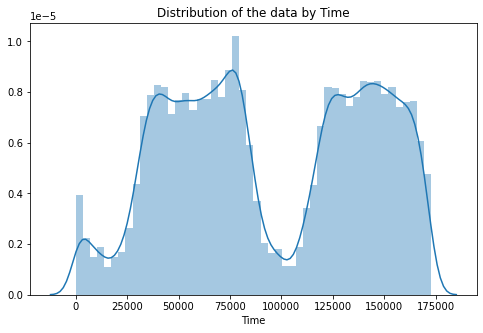

In [34]:
plt.figure(figsize=(8,5))
plt.title('Distribution of the data by Time')
sns.distplot(df['Time'])

In [35]:
print('Mean of the Time:', np.mean(df['Time']))
print('Median of the Time:', np.median(df['Time']))
print('Maximum Time:', np.max(df['Time']))
print('Minimum TIme:', np.min(df['Time']))

Mean of the Time: 94813.85957508067
Median of the Time: 84692.0
Maximum Time: 172792.0
Minimum TIme: 0.0


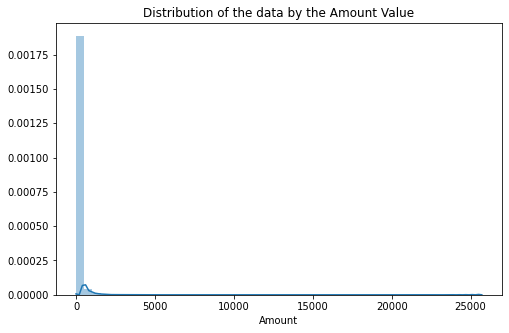

In [36]:
plt.figure(figsize=(8,5))
plt.title('Distribution of the data by the Amount Value')
sns.distplot(df['Amount'])

In [37]:
print('Mean of the Amount:', np.mean(df['Amount']))
print('Median of the Amount:', np.median(df['Amount']))
print('Maximum Amount:', np.max(df['Amount']))
print('Minimum Amount:', np.min(df['Amount']))

Mean of the Amount: 88.34961925093133
Median of the Amount: 22.0
Maximum Amount: 25691.16
Minimum Amount: 0.0


Calculating the total and percentage of both clean and fraudulent transactions

In [38]:
counts = df.Class.value_counts()
clean = counts[0]
fraudulent = counts[1]
percent_clean = (clean/(clean+fraudulent))*100
percent_fraudulent = (fraudulent/(clean+fraudulent))*100
print('There were {} Non-Fraudulent transactions ({:.2f}%) and {} Fraudulent transactions ({:.2f}%).'.format(clean, percent_clean, fraudulent, percent_fraudulent))

There were 284315 Non-Fraudulent transactions (99.83%) and 492 Fraudulent transactions (0.17%).


Preprocessing the Time and Amount variables for model creation and analysis

In [39]:
from sklearn.preprocessing import StandardScaler

Scaling the time variable using the .fit_transform method

In [40]:
scaler = StandardScaler()
ScaledTime = scaler.fit_transform(df[['Time']])
fl1 = [item for sublist in ScaledTime.tolist() for item in sublist]
ScaledTime = pd.Series(fl1)

Scaling the Amount

In [41]:
ScaledAmount = scaler.fit_transform(df[['Amount']])
fl2 = [item for sublist in ScaledAmount.tolist() for item in sublist]
ScaledAmount = pd.Series(fl2)

Adding these two new variables with the main dataframe df

In [42]:
df = pd.concat([df, ScaledAmount.rename('ScaledAmount'), ScaledTime.rename('ScaledTime')], axis=1)

In [43]:
df.head(10)

Time    V1    V2    V3    V4    V5    V6        V7    V8    V9  ...   V25  \
0   0.0 -1.36 -0.07  2.54  1.38 -0.34  0.46  2.40e-01  0.10  0.36  ...  0.13   
1   0.0  1.19  0.27  0.17  0.45  0.06 -0.08 -7.88e-02  0.09 -0.26  ...  0.17   
2   1.0 -1.36 -1.34  1.77  0.38 -0.50  1.80  7.91e-01  0.25 -1.51  ... -0.33   
3   1.0 -0.97 -0.19  1.79 -0.86 -0.01  1.25  2.38e-01  0.38 -1.39  ...  0.65   
4   2.0 -1.16  0.88  1.55  0.40 -0.41  0.10  5.93e-01 -0.27  0.82  ... -0.21   
5   2.0 -0.43  0.96  1.14 -0.17  0.42 -0.03  4.76e-01  0.26 -0.57  ... -0.23   
6   4.0  1.23  0.14  0.05  1.20  0.19  0.27 -5.16e-03  0.08  0.46  ...  0.75   
7   7.0 -0.64  1.42  1.07 -0.49  0.95  0.43  1.12e+00 -3.81  0.62  ... -0.42   
8   7.0 -0.89  0.29 -0.11 -0.27  2.67  3.72  3.70e-01  0.85 -0.39  ...  0.37   
9   9.0 -0.34  1.12  1.04 -0.22  0.50 -0.25  6.52e-01  0.07 -0.74  ... -0.07   

    V26       V27       V28  Amount  Class  normAmount  normTime  \
0 -0.19  1.34e-01 -2.11e-02  149.62      0        0.24    -54.87   
1  0.13 -8.98e-03  1.47e-02    2.69      0       -0.33    -54.87   
2 -0.14 -5.54e-02 -5.98e-02  378.66      0        1.13    -54.87   
3 -0.22  6.27e-02  6.15e-02  123.50      0        0.14    -54.87   
4  0.50  2.19e-01  2.15e-01   69.99      0       -0.07    -54.87   
5  0.11  2.54e-01  8.11e-02    3.67      0       -0.33    -54.87   
6 -0.26  3.45e-02  5.17e-03    4.99      0       -0.32    -54.87   
7 -0.05 -1.21e+00 -1.09e+00   40.80      0       -0.19    -54.87   
8 -0.38  1.17e-02  1.42e-01   93.20      0        0.02    -54.87   
9  0.09  2.46e-01  8.31e-02    3.68      0       -0.33    -54.87   

   ScaledAmount  ScaledTime  
0          0.24        -2.0  
1         -0.34        -2.0  
2          1.16        -2.0  
3          0.14        -2.0  
4         -0.07        -2.0  
5         -0.34        -2.0  
6         -0.33        -2.0  
7         -0.19        -2.0  
8          0.02        -2.0  
9         -0.34        -2.0  

[10 rows x 35 columns]

In [44]:
df.sample(10)

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  \
23261    32661.0  1.16 -0.72  0.39  0.21 -0.44  1.09 -0.80  0.26 -0.75  ...   
263074  160787.0 -0.84  1.27 -1.11 -0.37 -0.91 -0.28 -0.88  1.44  0.05  ...   
243052  151769.0 -0.90  1.17 -0.38 -0.86  0.68 -0.86  0.90 -0.17  0.72  ...   
97810    66395.0 -1.71  1.88  0.65 -0.03 -0.45 -0.75  0.27  0.34  0.08  ...   
104533   69112.0 -2.31 -0.95  2.21  1.69  2.05 -0.62  0.88 -0.39 -0.52  ...   
102081   68046.0 -1.81  1.75  1.64  0.62 -0.84  0.25 -0.39  0.48  0.97  ...   
59582    48906.0 -1.20  0.30  0.06  3.12  0.48 -0.22  0.47  0.51 -1.95  ...   
109364   71351.0  1.02 -1.03 -0.60 -0.82  1.20  3.92 -1.06  1.02  1.06  ...   
142004   84549.0  1.25 -0.42  0.89 -0.72 -1.29 -0.85 -0.64  0.02  1.97  ...   
182262  125324.0  1.95 -0.09 -0.93  0.48 -0.49 -1.85  0.33 -0.53  0.20  ...   

         V25   V26   V27   V28  Amount  Class  normAmount  normTime  \
23261   0.58 -0.15  0.08  0.02   79.00      0       -0.04    -35.97   
263074 -1.32 -0.08 -0.56 -0.18   40.00      0       -0.19     38.18   
243052 -0.22  0.20  0.50  0.23    3.08      0       -0.33     32.96   
97810  -0.20  0.04 -0.21  0.19   15.99      0       -0.28    -16.45   
104533  0.85 -0.22 -0.36 -0.35   64.63      0       -0.09    -14.87   
102081 -0.07 -0.25 -0.04 -0.40    4.74      0       -0.33    -15.49   
59582  -1.07  0.09  0.34  0.10  150.91      0        0.24    -26.57   
109364  0.25  0.94 -0.06  0.03  136.99      0        0.19    -13.58   
142004  0.47 -0.68  0.09  0.03    1.00      0       -0.34     -5.94   
182262 -0.04  0.72 -0.09 -0.05   39.95      0       -0.19     17.66   

        ScaledAmount  ScaledTime  
23261          -0.04       -1.31  
263074         -0.19        1.39  
243052         -0.34        1.20  
97810          -0.29       -0.60  
104533         -0.09       -0.54  
102081         -0.33       -0.56  
59582           0.25       -0.97  
109364          0.19       -0.49  
142004         -0.35       -0.22  
182262         -0.19        0.64  

[10 rows x 35 columns]

Seeing that the normAmount variable and the ScaledAmount variable are actually similar, I will drop the normAmount variable along with the Amount and Time columns

In [45]:
df.drop(['normAmount', 'normTime', 'Amount', 'Time'], axis=1, inplace=True)

Splitting the data into Train and Test sets. Setting the train set to contain 70% of the dataset and the test set to contain 30% of the dataset.

In [46]:
spl = np.random.rand(len(df)) <= 0.70
train = df[spl]
test = df[~spl]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (199067, 31)
Test Shape: (85740, 31)


Reset the indexing of both the train and test sets

In [47]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

Trying to look for a balance for our data set, since the cases of Non-Fraudulent transactions are way larger than the Fraudulent cases. I will randomly try to select an equal amount of Fraudulent and Non Fraudulent cases.

First we find the number of Fraudulent Cases in our train data dataset. 

In [48]:
FraudCount = train['Class'].value_counts()[1]
print('The train dataset has {} fraudulent transactions.'.format(FraudCount))

The train dataset has 320 fraudulent transactions.


Now we randomly select the same number of non fraudulent cases from our train dataset

In [49]:
NonFraud = train[train['Class'] == 0]
Fraud = train[train['Class'] == 1]

In [50]:
train.Class.value_counts()

0    198747
1       320
Name: Class, dtype: int64

In [51]:
RS = NonFraud.sample(FraudCount)

In [52]:
RS

V1    V2    V3    V4    V5    V6    V7    V8        V9   V10  ...  \
76750  -1.60  0.36  1.00  0.29  0.80  0.13  0.31  0.66 -2.99e-01 -1.11  ...   
115670  0.05  0.84  0.26 -0.60  0.41 -1.10  0.99 -0.18  9.63e-03 -0.40  ...   
93835  -0.09 -0.64  1.82 -2.17 -1.38 -1.16 -0.68 -0.05 -1.92e+00  0.90  ...   
59182  -2.40 -1.52  0.74  0.64  0.22 -1.00  1.62 -0.37 -3.05e-01 -0.59  ...   
24796   1.24  0.30  0.29  0.70 -0.41 -1.08  0.07 -0.19  8.60e-02 -0.28  ...   
...      ...   ...   ...   ...   ...   ...   ...   ...       ...   ...  ...   
66016   1.13  0.11  0.28  1.21  0.05  0.33 -0.04  0.16  7.36e-02  0.04  ...   
66471  -8.27  5.08 -2.10  0.91 -3.58  0.55 -2.59  2.96  3.36e+00  4.43  ...   
20416  -1.89 -1.54  2.04 -2.60  1.08 -1.60 -0.76  0.20  1.83e+00 -2.37  ...   
2985    1.38 -0.72 -0.93 -1.61  1.45  3.28 -1.16  0.71  3.59e-01  0.28  ...   
14300   1.23 -0.73  0.27 -0.32 -1.07 -0.81 -0.23 -0.28 -6.94e-01  0.49  ...   

         V22   V23   V24   V25   V26   V27       V28  Class  ScaledAmount  \
76750  -0.36 -0.32 -0.92  0.79 -0.33 -0.08 -1.14e-01      0     -1.42e-01   
115670 -0.61  0.06 -0.04 -0.49  0.14  0.25  9.60e-02      0     -3.43e-01   
93835   0.48  0.02  0.67 -0.41 -0.33  0.10  7.36e-02      0     -3.22e-01   
59182   0.34  1.63  0.40  0.58  0.57  0.27 -1.63e-01      0      7.58e-01   
24796  -0.86  0.13  0.34  0.20  0.09 -0.03  3.17e-02      0     -3.08e-01   
...      ...   ...   ...   ...   ...   ...       ...    ...           ...   
66016  -0.02 -0.12 -0.29  0.67 -0.31  0.03  3.76e-03      0     -2.85e-01   
66471  -0.87  0.49  0.11  0.54 -0.54 -1.32  7.95e-01      0     -3.23e-01   
20416   0.81 -0.16  0.15  0.85 -0.65  0.07  9.77e-02      0     -2.98e-01   
2985   -0.90  0.07  0.92  0.35 -0.51 -0.02  1.73e-02      0     -1.42e-01   
14300  -0.89 -0.03  0.46  0.33  1.00 -0.06  1.89e-02      0      2.20e-03   

        ScaledTime  
76750        -0.49  
115670        0.48  
93835        -0.30  
59182        -0.72  
24796        -1.19  
...            ...  
66016        -0.63  
66471        -0.62  
20416        -1.25  
2985         -1.92  
14300        -1.34  

[320 rows x 31 columns]

Joining both the Fraud and RS dataframes together

In [53]:
setSample = pd.concat([Fraud, RS])

In [54]:
len(setSample)

640

In [55]:
setSample.head(10)

V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  ...  \
422  -3.04e+00 -3.16  1.09  2.29  1.36 -1.06  0.33 -0.07 -0.27 -0.84  ...   
3410 -2.30e+00  1.76 -0.36  2.33 -0.82 -0.08  0.56 -0.40 -0.24 -1.53  ...   
4252 -4.40e+00  1.36 -2.59  2.68 -1.13 -1.71 -3.50 -0.25 -0.25 -4.80  ...   
4403  8.43e-03  4.14 -6.24  6.68  0.77 -3.35 -1.63  0.15 -2.80 -6.19  ...   
4407  3.30e-01  3.71 -5.78  6.08  1.67 -2.42 -0.81  0.13 -2.21 -5.13  ...   
4484  7.03e-01  2.43 -5.23  4.42 -2.17 -2.67 -3.88  0.91 -0.17 -5.01  ...   
4544 -1.59e+00  3.26 -4.14  2.36 -1.41 -1.88 -3.51  1.52 -1.21 -6.23  ...   
4594 -1.78e+00  3.40 -3.82  2.63 -1.98 -2.73 -3.43  1.41 -0.78 -6.20  ...   
4617  8.57e-01  4.09 -7.42  7.38  0.97 -2.73 -1.50  0.54 -2.35 -3.94  ...   
4669 -1.81e+00  4.92 -5.93  5.70  1.20 -3.04 -1.71  0.56 -3.80 -7.45  ...   

           V22   V23   V24   V25   V26   V27   V28  Class  ScaledAmount  \
422   4.35e-01  1.38 -0.29  0.28 -0.15 -0.25  0.04      1          1.76   
3410 -9.32e-01  0.17 -0.09 -0.16 -0.54  0.04 -0.15      1          0.61   
4252  1.77e-01 -0.44 -0.05  0.25 -0.66 -0.83  0.85      1         -0.12   
4403 -6.08e-01 -0.54  0.13  1.49  0.51  0.74  0.51      1         -0.35   
4407 -6.52e-01 -0.55 -0.72  1.42  0.56  0.53  0.40      1         -0.35   
4484 -9.80e-03  0.72  0.47 -1.96  0.32  0.60  0.13      1         -0.35   
4544 -5.47e-01 -0.08 -0.43  0.12  0.32  0.26  0.13      1         -0.35   
4594 -5.78e-01  0.05  0.46  0.04  0.31  0.53  0.24      1         -0.35   
4617  1.45e-01  0.24 -0.23 -1.00  0.44  0.62  0.15      1         -0.35   
4669 -4.06e-01 -0.74 -0.28  1.11  0.32  0.89  0.57      1         -0.35   

      ScaledTime  
422        -1.99  
3410       -1.90  
4252       -1.85  
4403       -1.84  
4407       -1.84  
4484       -1.84  
4544       -1.83  
4594       -1.83  
4617       -1.82  
4669       -1.82  

[10 rows x 31 columns]

Notice how the data is arranged in the order with which we have imported it. Now we reshuffle the index of the data set

In [56]:
setSample = setSample.sample(frac=1).reset_index(drop=True)
setSample.head(10)

V1    V2     V3    V4    V5        V6     V7    V8    V9    V10  ...  \
0  -6.75  5.37 -10.05  9.06 -7.97 -2.26e+00 -10.32  4.24 -5.32 -11.09  ...   
1  -0.41 -0.19   1.44 -1.66 -0.10  4.35e-03   0.23 -0.13 -0.91   0.47  ...   
2   1.90  0.44  -0.42  3.50  0.56  8.77e-01  -0.20  0.27 -0.87   1.54  ...   
3  -1.93  1.83  -7.02  5.35 -2.74 -2.11e+00  -5.02  1.21 -4.38  -8.34  ...   
4   1.16  1.27  -1.58  1.47  1.16 -1.01e+00   0.66 -0.15 -0.85  -1.45  ...   
5   1.63 -0.35  -2.11  1.27  0.65 -7.81e-01   1.02 -0.49 -0.22   0.21  ...   
6  -2.25 -0.11   0.73  1.66 -0.05  5.50e-01   0.67 -0.22 -0.35   0.94  ...   
7 -10.94  6.26 -14.18  7.18 -9.95 -3.86e+00 -13.55  7.10 -6.29 -13.61  ...   
8   2.04 -0.04  -1.43  0.15  0.28 -6.41e-01   0.11 -0.17  0.30   0.17  ...   
9   1.18  0.62  -0.26  1.29 -0.03 -1.06e+00   0.16 -0.06 -0.24  -0.49  ...   

    V22   V23   V24   V25   V26   V27   V28  Class  ScaledAmount  ScaledTime  
0 -0.35  0.43  0.67 -0.78 -0.25  1.16  0.20      1          0.48       -0.02  
1 -1.02  0.17 -0.55 -0.86  0.16 -0.15 -0.07      0         -0.22        1.55  
2 -1.47  0.52  0.14 -0.56 -0.63 -0.02 -0.04      0         -0.35        1.17  
3 -0.79 -0.77 -0.38  0.72  1.11  1.28  0.82      1          1.69       -0.22  
4 -0.20 -0.20 -0.28  0.79 -0.28  0.06  0.09      0         -0.35       -1.43  
5  0.06 -0.14  0.59  0.32 -0.65 -0.07 -0.01      0          0.61        1.11  
6  0.53 -1.43 -0.19 -0.34 -0.12 -0.27 -1.09      0          0.51       -0.84  
7 -0.49 -0.24  0.45 -0.10  0.45  0.06 -0.44      1         -0.17       -1.13  
8  0.95  0.03  0.80  0.26 -0.16 -0.03 -0.06      0         -0.35        1.10  
9 -0.04 -0.10  0.38  0.61 -0.35  0.03  0.05      0         -0.35       -0.72  

[10 rows x 31 columns]

Removing Outliers

In [57]:
q1 = setSample.quantile(0.25)
q3 = setSample.quantile(0.75)
IQR = q3 - q1

dt = setSample[~((setSample < (q1 - 2.5 * IQR)) |(setSample > (q3 + 2.5 * IQR))).any(axis=1)]

In [58]:
lenAfter = len(dt)
lenBefore = len(setSample)
lenDifference = len(setSample) - len(dt)

print('Our data size has been reduced from {} transaction by {} transactions. Now we have {} transactions. All outliers above and below the median or average transaction value has been removed.'.format(lenBefore, lenDifference, lenAfter))

Our data size has been reduced from 640 transaction by 181 transactions. Now we have 459 transactions. All outliers above and below the median or average transaction value has been removed.


**Taking a look at correlation of the new set sample

In [59]:
corr = dt.corr()
corr = corr[['Class']]
corr

Class
V1           -3.17e-01
V2            6.11e-01
V3           -6.40e-01
V4            6.98e-01
V5           -2.01e-01
V6           -3.98e-01
V7           -5.49e-01
V8            2.48e-01
V9           -5.38e-01
V10          -7.03e-01
V11           6.68e-01
V12          -6.81e-01
V13          -5.43e-02
V14          -7.66e-01
V15          -1.27e-01
V16          -4.85e-01
V17          -4.57e-01
V18          -2.61e-01
V19           8.68e-02
V20           3.32e-01
V21           3.94e-01
V22           3.22e-02
V23          -1.37e-01
V24          -1.74e-01
V25           7.69e-02
V26           6.23e-02
V27           4.15e-01
V28           3.67e-01
Class         1.00e+00
ScaledAmount  3.50e-03
ScaledTime   -6.76e-02

Looking out for correlations on both sides of the region of 0.5

In [60]:
#Correlation greater than 0.5, that is positive correlation
corr[corr.Class > 0.5]

Class
V2      0.61
V4      0.70
V11     0.67
Class   1.00

Visualising features with high positive correlation

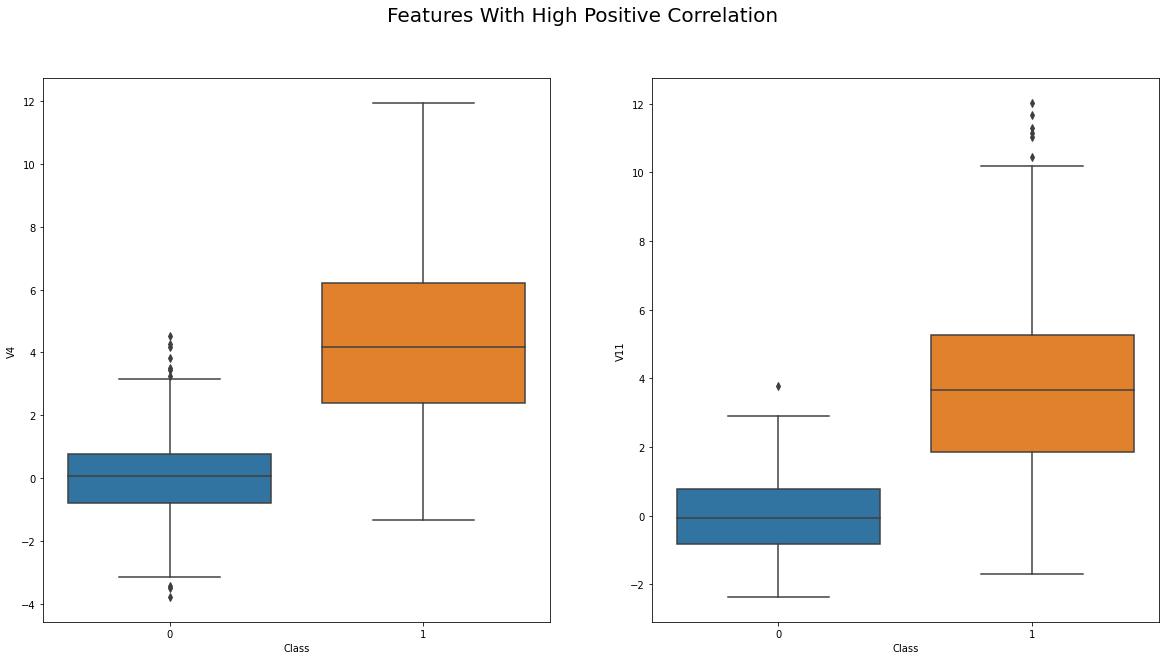

In [61]:
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=setSample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=setSample, ax=axes[1])

In [62]:
#Correlation less than 0.5, that is negative correlation
corr[corr.Class < -0.5]

Class
V3   -0.64
V7   -0.55
V9   -0.54
V10  -0.70
V12  -0.68
V14  -0.77

Visualising features with negative correlation

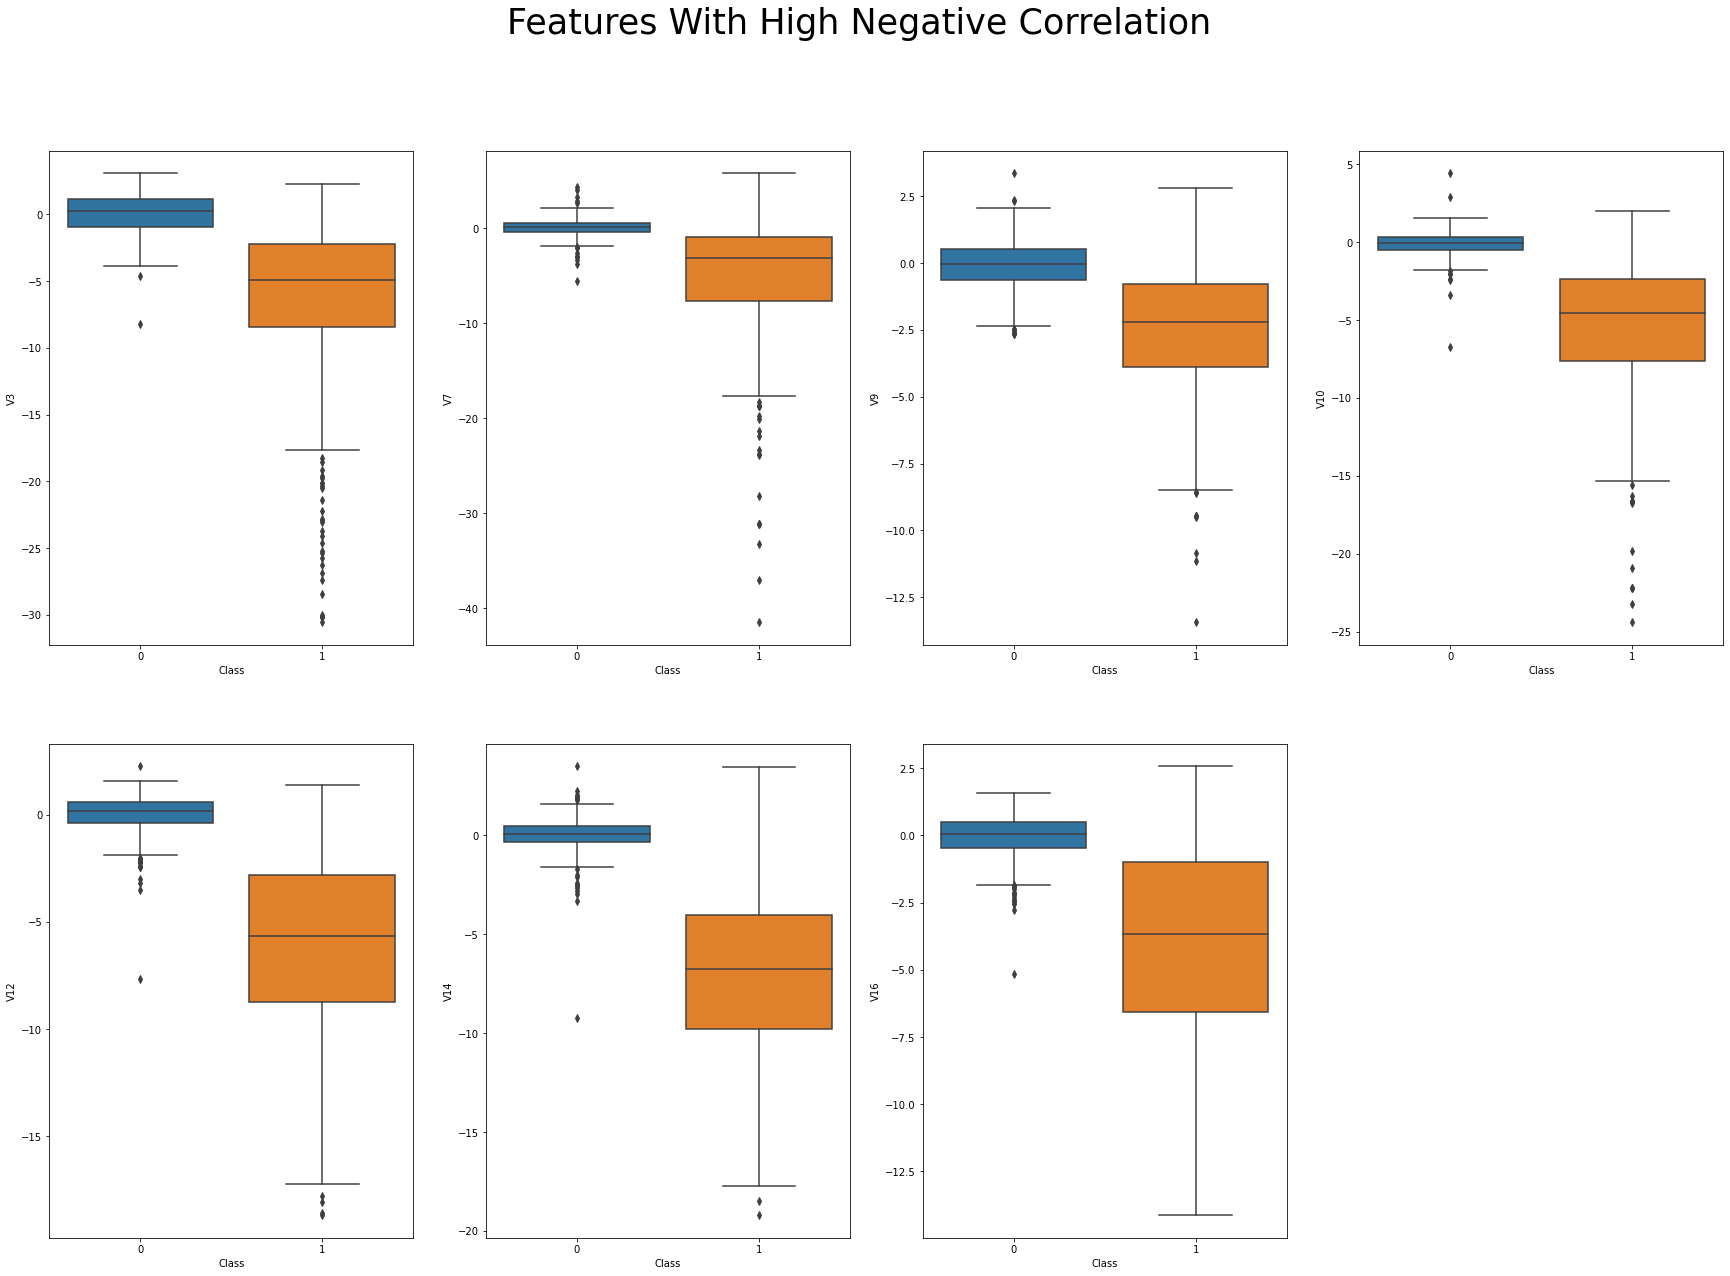

In [63]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,20))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=setSample, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=setSample, ax=axes[0,1])
sns.boxplot(x="Class", y="V9", data=setSample, ax=axes[0,2])
sns.boxplot(x="Class", y="V10", data=setSample, ax=axes[0,3])
sns.boxplot(x="Class", y="V12", data=setSample, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=setSample, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=setSample, ax=axes[1,2])

f.delaxes(axes[1,3])

**t_SNE Dimensionality Reduction

In [64]:
NoClass = dt.drop('Class', axis=1)
clas = dt['Class']

In [65]:
#t-SNE
NoClass_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(NoClass.values)

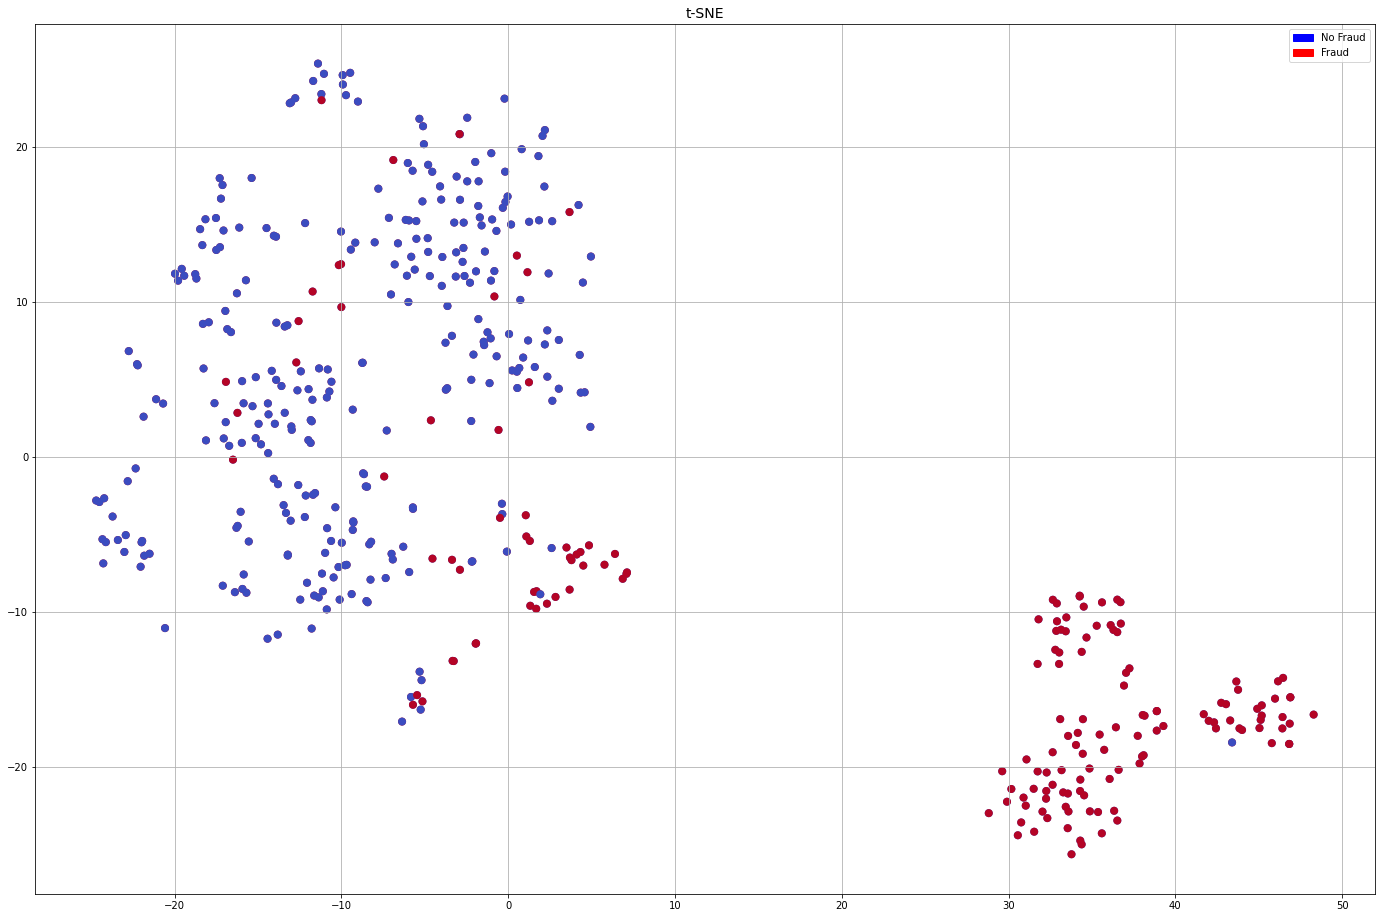

In [66]:
# t_SNE plot
f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')

ax.scatter(NoClass_reduced_tsne[:,0], NoClass_reduced_tsne[:,1], c=(clas == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(NoClass_reduced_tsne[:,0], NoClass_reduced_tsne[:,1], c=(clas == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

**Classifier Algorithms
1. LogisticRegression
2. LinearDiscriminantAnalysis
3. KNeighborsClassifier
4. DecisionTreeClassifier
5. Support Vector Machines (SVC)
6. XGBClassifier
7. RandomForestClassifier

Importing libraries for classifier algorithms

In [67]:
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


Initialising WARNING

In [68]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Initialising the **train_test_split**

In [69]:
from sklearn.model_selection import train_test_split

NoClass_train, NoClass_test, clas_train, clas_test = train_test_split(NoClass, clas, test_size=0.2, random_state=42)

In [70]:
NoClass_train = NoClass_train.values
NoClass_validation = NoClass_test.values
clas_train = clas_train.values
clas_validation = clas_test.values

In [71]:
# Creating a list for the models to be stored in
models = []

In [72]:
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

Testing the models

In [73]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=20)
    cv_results = cross_val_score(model, NoClass_train, clas_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    md = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(md)

LR: 0.970097 (0.009287)
LDA: 0.966029 (0.010650)
KNN: 0.937427 (0.019245)
CART: 0.872055 (0.040960)
SVM: 0.963825 (0.018619)
XGB: 0.974088 (0.008756)
RF: 0.969335 (0.016053)
NB: 0.952089 (0.029023)


Comparing the performance of the different model algorithms in a boxplot

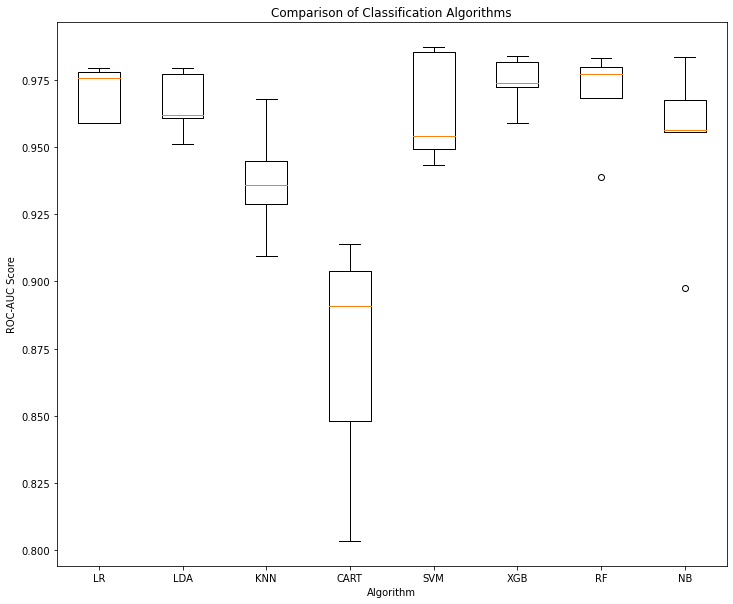

In [74]:
fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

**Decision Tree Visualization

In [75]:
#Random Forest Classifier with 10 fold estimators
RFCmodel = RandomForestClassifier(n_estimators=10)

In [76]:
RFCfit = RFCmodel.fit(NoClass_train, clas_train)

In [77]:
RFCfit

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Extracting a single Decision Tree

In [78]:
est = RFCmodel.estimators_[9]

In [79]:
est

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2068893741, splitter='best')

In [80]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(est, out_file='tree.dot', 
                feature_names = NoClass.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command that requires Graphviz
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display the image in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
from neupy import algorithms